In [1]:
from coco_dataset import CocoDataset
from utils import display_image
import torch
import torchvision.models as models
import requests

### Reference: https://gist.github.com/jkarimi91/d393688c4d4cdb9251e3f939f138876e

#### Get the labels used to train VGG

In [2]:
response = requests.get('https://s3.amazonaws.com/outcome-blog/imagenet/labels.json')
labels = {int(key): value for key, value in response.json().items()}

#### Load the pretrained VGG-16 model

In [3]:
vgg16 = models.vgg16(pretrained=True)
params_count = sum(p.numel() for p in vgg16.parameters() if p.requires_grad)
print('Tunable params:', params_count)

Tunable params: 138357544


#### Load the fake dataset with only one image of a dog inside

In [4]:
coco = CocoDataset('../data/test_data')

#### Get the model output

In [5]:
outputs = vgg16(coco[0].unsqueeze(0))
_, preds = torch.max(outputs.data, 1)
print(labels[preds.item()])

Labrador retriever


#### Same on the first few images of the real dataset, using a dataloader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


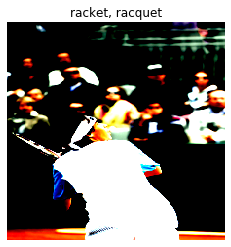

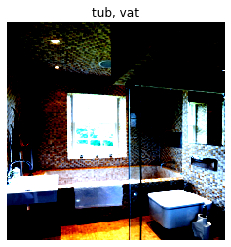

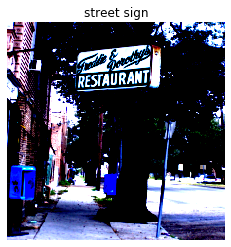

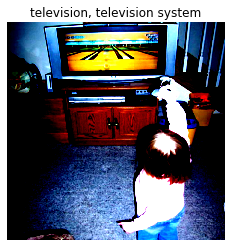

In [6]:
coco = CocoDataset('../data/coco_data')
data_loader = torch.utils.data.DataLoader(coco, batch_size=4, shuffle=True)
one_batch_images = next(iter(data_loader))
outputs = vgg16(one_batch_images)
_, preds = torch.max(outputs.data, 1)
for i, image in enumerate(one_batch_images):
    display_image(image, labels[preds[i].item()])